# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
train_features, train_labels = train['features'], train['labels']
test_features, test_labels = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

### Step 1.1: Basic statistic Info of the image data

In [2]:
### Replace each question mark with the appropriate value.

# Number of training examples
n_train = len(train_features)

# Number of testing examples.
n_test = len(test_features)

# What's the shape of an traffic sign image?
image_shape = '{0}x{1}'.format(len(train_features[0]), len(train_features[0][0]))

# How many unique classes/labels there are in the dataset.
n_classes = max(train_labels) + 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = 32x32
Number of classes = 43


### Step 1.2: Sign names corresponding to its class ID

In [3]:
# take a look at the info of signs
import csv

sign_name = []
class_id = []

with open('signnames.csv') as f:
    reader = csv.DictReader(f)
    print('{0}\t-\t{1}'.format('ID', 'Name'))
    for row in reader:
        i = int(row['ClassId'])
        s = row['SignName']
        class_id.append(i)
        sign_name.append(s)
        print('{0}\t-\t{1}'.format(i, s))

ID	-	Name
0	-	Speed limit (20km/h)
1	-	Speed limit (30km/h)
2	-	Speed limit (50km/h)
3	-	Speed limit (60km/h)
4	-	Speed limit (70km/h)
5	-	Speed limit (80km/h)
6	-	End of speed limit (80km/h)
7	-	Speed limit (100km/h)
8	-	Speed limit (120km/h)
9	-	No passing
10	-	No passing for vehicles over 3.5 metric tons
11	-	Right-of-way at the next intersection
12	-	Priority road
13	-	Yield
14	-	Stop
15	-	No vehicles
16	-	Vehicles over 3.5 metric tons prohibited
17	-	No entry
18	-	General caution
19	-	Dangerous curve to the left
20	-	Dangerous curve to the right
21	-	Double curve
22	-	Bumpy road
23	-	Slippery road
24	-	Road narrows on the right
25	-	Road work
26	-	Traffic signals
27	-	Pedestrians
28	-	Children crossing
29	-	Bicycles crossing
30	-	Beware of ice/snow
31	-	Wild animals crossing
32	-	End of all speed and passing limits
33	-	Turn right ahead
34	-	Turn left ahead
35	-	Ahead only
36	-	Go straight or right
37	-	Go straight or left
38	-	Keep right
39	-	Keep left
40	-	Roundabout mandatory
4

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

### Step 1.3: Histogram of training image data

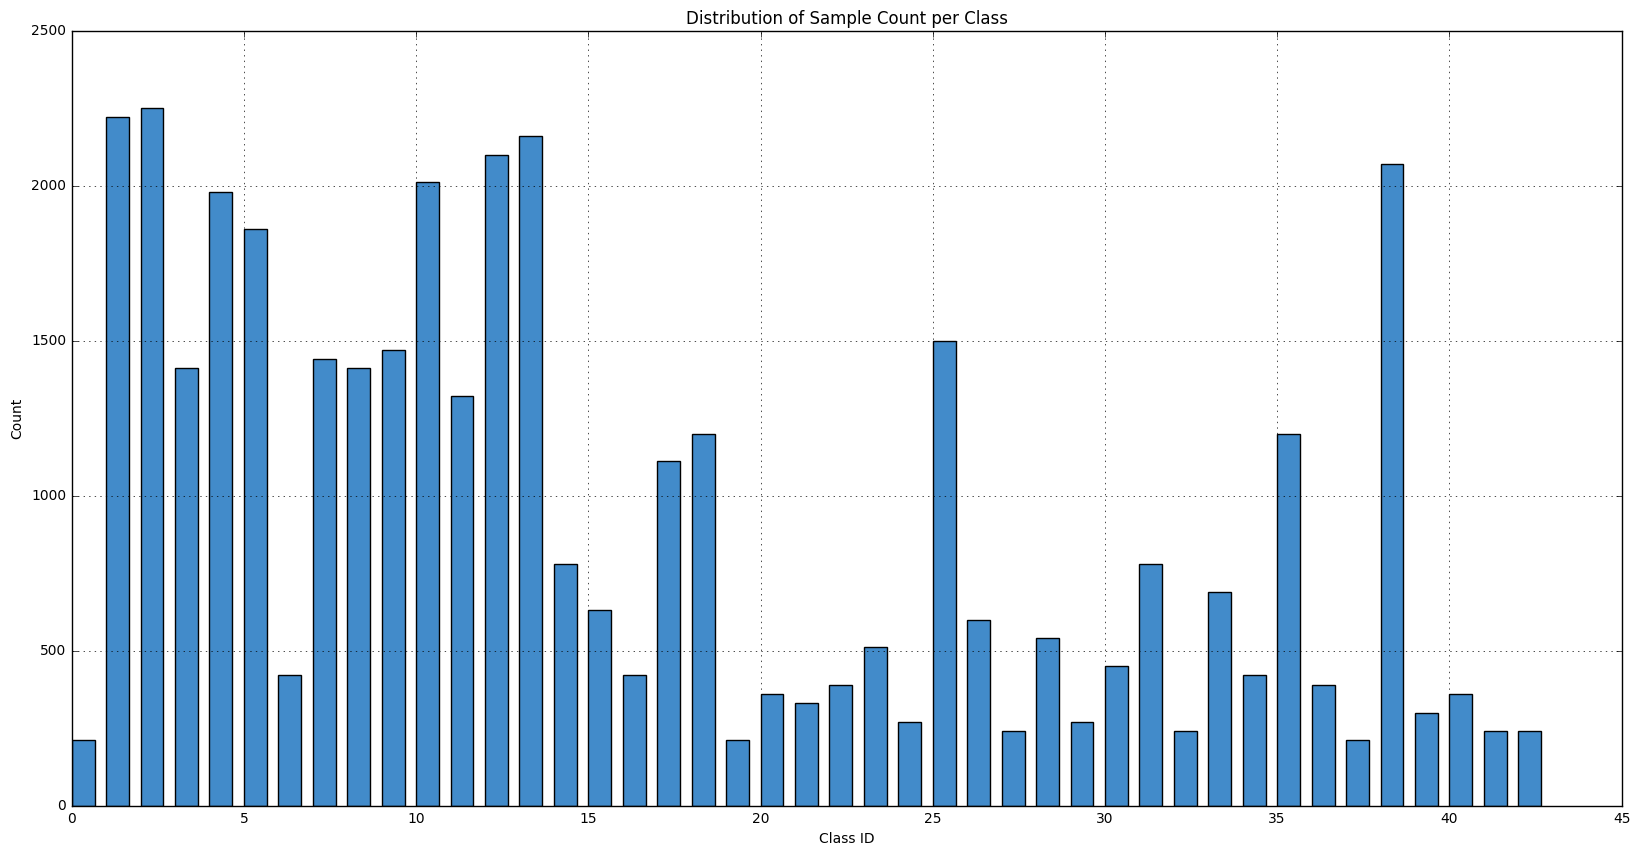

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np

# Visualizations will be shown in the notebook.
%matplotlib inline

train_features = np.array(train['features'])
train_labels = np.array(train['labels'])
class_cnt = np.bincount(train_labels)
max_class = np.max(class_cnt)

# plot the distribution of train dataset
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111)
ax.set_ylabel('Count')
ax.set_xlabel('Class ID')
ax.set_title('Distribution of Sample Count per Class')
ax.bar(range(len(class_cnt)), class_cnt, width=2/3, color='#428bca')
ax.grid(True)
plt.show()

### Step1.4: Randomly show the images of the training data

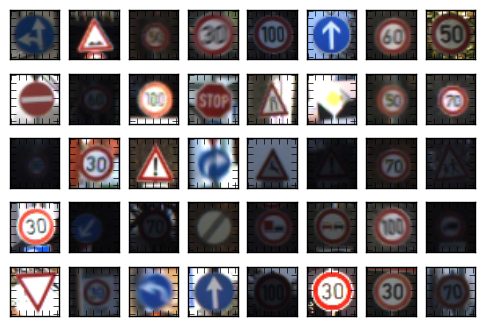

In [5]:
# Randomly show the images of sings
index = np.arange(n_train)
np.random.shuffle(index)

fig, xaxis = plt.subplots(5,8)
for i in range(5):
    for j in range(8):
        xaxis[i, j].imshow(train_features[index[j+10*i]]) 
        # make xlabel insivible
        plt.setp(xaxis[i,j].get_xticklabels(), visible=False)
        plt.setp(xaxis[i,j].get_yticklabels(), visible=False)


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Step 2.1: Define the preprocessing methods

#### Generating additional data

In [6]:
# Image Dataset Preprocess!!!

## Generate additional image data to make up the classes which have fewer image data.
### Rotating the angle of images from ±5 degree to ±15 degree with the step 5 degree.
import scipy.ndimage

def generate_additional_image_data(features, labels):
    class_cnt = np.bincount(labels)
    max_class_n = np.max(class_cnt)
    
    ### angle list used to rotate the images. 
    angles = [5, -5, 10, -10, 15, -15]

    ### The classes whoes number of data is 3 times less than that of class with most number of data
    ### are added additional image data.
    ### The maximum times to add additional data is 6 times, which is the number of rotating angles.
    for i, cnt in enumerate(class_cnt):
        adding_times = min(int(max_class_n/cnt) - 1, len(angles))
        
        if adding_times <= 1:
            continue

        added_features = []
        added_labels = []
        target = np.where(labels == i)
        for j in range(adding_times):
            for feature in features[target]:
                added_features.append(scipy.ndimage.rotate(feature, angles[j], reshape=False))
                added_labels.append(i)

        features = np.append(features, added_features, axis=0)
        labels = np.append(labels, added_labels, axis=0)
    return features, labels

#### Converting images to grey and Normalize the data

In [7]:
## Change 3 channels(color) to 1 channel(grey)
### CLAHE (Contrast Limited Adaptive Histogram Equalization) which is suggested by Open CV 2
### As paper "Traffic Sign Recognition with Multi-Scale Convolutional Networks" said,
### Y channel of yuv is enough. So, Y channel is processed only
import cv2

def normalize(img):
    max_val = np.max(img)
    min_val = np.min(img)

    return 0.1 + np.divide((img - min_val)*0.8, (max_val - min_val))

def to_grey(image):
    img = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    Y, U, V = cv2.split(img)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(6,6))
    Y = clahe.apply(Y)

    return normalize(Y)

## Process all the image dataset with to_grey method.
def to_grey_processor(features):
    ### get number of dataset
    n = features.shape[0]
    size_w = features.shape[1]
    size_h = features.shape[2]
    
    ### initialize 
    features_grey = np.zeros([n, size_w, size_h])

    for i in range(n):
        features_grey[i,] = to_grey(features[i])    
    return features_grey

#### Check converting method: to_grey

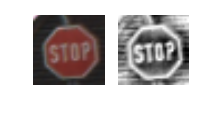

Image dimension before the process: (32, 32, 3)
Image dimension before the process: (32, 32)


In [8]:
## Plot a single image under before and after making it grey

img = train_features[23000]
fig   = plt.figure(figsize=(2,1))

### original image
fig.add_subplot(1,2,1)
plt.imshow(img)
plt.axis('off')

### Processed Y channel of image
fig.add_subplot(1,2,2)
res = to_grey(img)
plt.imshow(res, cmap='gray')
plt.axis('off')

plt.show()
print("Image dimension before the process: {}".format(img.shape))
print("Image dimension before the process: {}".format(res.shape))


#### Flatten data: vectorize data into 1 dimension

In [9]:
## Flatten Image dataset from 3 dimensions to 1 dimension
def flatten_dataset(features):
    n = features.shape[0]
    n_pix = features.shape[1]*features.shape[2]

    return np.reshape(features,[n,n_pix])

#### one-hot encoding

In [10]:
## Turn labels into numbers and apply One-Hot Encoding
from sklearn.preprocessing import LabelBinarizer
def one_hot_encoding(labels):
    encoder = LabelBinarizer()
    encoder.fit(labels)
    return encoder.transform(labels)

### Step 2.2: Preprocess Data

#### Preprocessing data

In [11]:
## Generate additional image data
train_features, train_labels = generate_additional_image_data(train_features, train_labels)

## Shuffle the training dataset to avoid the bad influence caused by the order of original images and rotated images.
from sklearn.utils import shuffle
train_features, train_labels = shuffle(train_features, train_labels)

## Process the color image data to grey image data
train_features = to_grey_processor(train_features)
test_features = to_grey_processor(test_features)

#### Histogram of training data wiht additional data

Check Image Dataset Processing Results


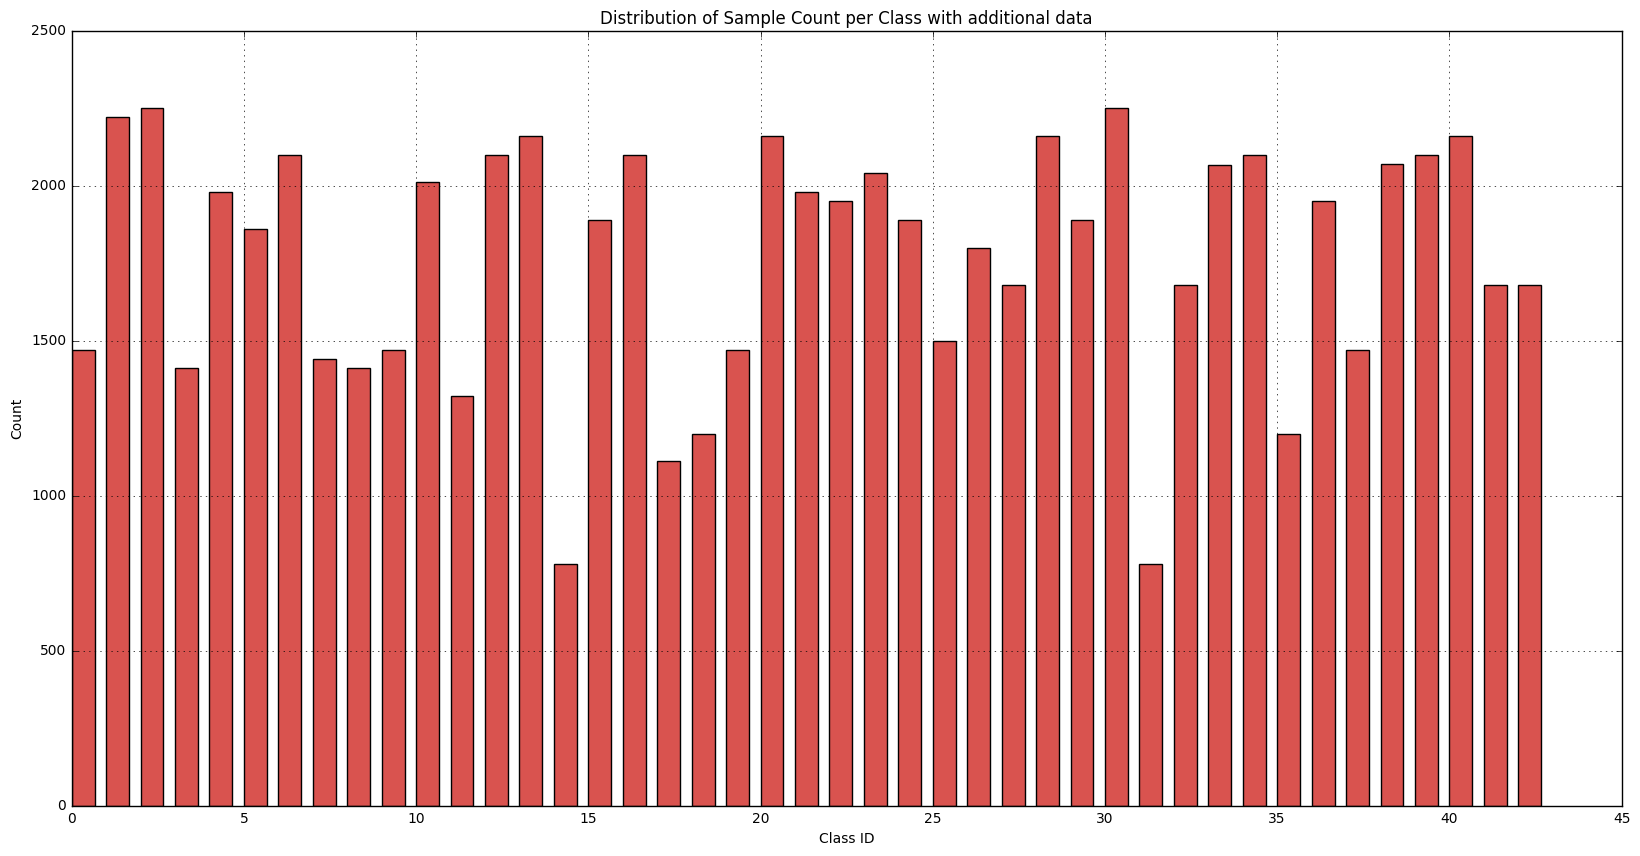

In [12]:
print("Check Image Dataset Processing Results")
## plot the distribution of train dataset with additional data
class_cnt = np.bincount(train_labels)

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111)
ax.set_ylabel('Count')
ax.set_xlabel('Class ID')
ax.set_title('Distribution of Sample Count per Class with additional data')
ax.bar(range(len(class_cnt)), class_cnt, width=2/3, color='#d9534f')
ax.grid(True)
plt.show()

#### Number of training data and testing data after generating additional data

In [13]:
# Nureber of datasets after adding image data
# Number of training examples
n_train = len(train_features)

# Number of testing examples.
n_test = len(test_features)

print("Number of training data =", n_train)
print("Number of testing data =", n_test)

Number of training data = 75987
Number of testing data = 12630


#### Randomly show the images of the training data after generating additional data and coverting images to grey

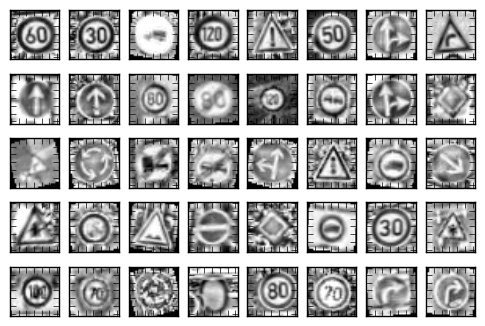

In [14]:
## Randomly show the processed images of sings
index = np.arange(n_train)
np.random.shuffle(index)

fig, xaxis = plt.subplots(5,8)
for i in range(5):
    for j in range(8):
        xaxis[i, j].imshow(train_features[index[j+10*i]], cmap='gray')
        # make xlabel insivible
        plt.setp(xaxis[i,j].get_xticklabels(), visible=False)
        plt.setp(xaxis[i,j].get_yticklabels(), visible=False)


#### Flattening the images and converting the ID labels into One-Hot labels

In [15]:
## Flatten the image dataset
train_features = flatten_dataset(train_features)
test_features = flatten_dataset(test_features)

## Convert ID labels into One-Hot labels
train_labels = one_hot_encoding(train_labels)
test_labels = one_hot_encoding(test_labels)

#### Building randomized dataset for training and validation

In [16]:
## Build randomized dataset for training and validation
from sklearn.model_selection import train_test_split
### As the instruction said, 20% is a good default value to split the dataset
train_features, valid_features, train_labels, valid_labels = train_test_split(
   train_features,
   train_labels,
   test_size=0.2,
   random_state=741213
)

### Step 2.3: Model Architecture

#### Step 2.3.1: Defining the methods used to build the netowrk

In [17]:
# Model Architecture
import tensorflow as tf

## create the weights for cnn
def create_weights(shape, mu=0, sigma=0.01):
    return tf.Variable(tf.truncated_normal(shape=shape, mean=mu, stddev=sigma))

## create the bias for cnn
def create_biases(length):
    return tf.Variable(tf.constant(0.0, shape=[length]))

## create conv layer
def create_conv_layer(input, depth, filter_size, n_filters, strides, padding, use_pooling=True):
    
    # Shape params of filter's Weights for the convolution.
    shape = [filter_size, filter_size, depth, n_filters]

    # Length of filter's bias for the convolution.
    length = n_filters

    weights = create_weights(shape)
    biases = create_biases(length)

    layer = tf.nn.conv2d(input, weights, strides=strides, padding=padding)
    layer += biases

    if use_pooling:
        layer = tf.nn.max_pool(layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')
    
    # activation funciton
    layer = tf.nn.relu(layer)
    
    return layer

## create flattern layer
def create_flattern_layer(layer):
    # get shape of input layer
    layer_shape = layer.get_shape()

    # The number of features is: img_h * img_w * depth
    n_features = layer_shape[1:4].num_elements()
    
    # Reshape the layer to [num of image, num. of features].
    flat_layer = tf.reshape(layer, [-1, n_features])

    return flat_layer, n_features

## create fully connected layer
def create_fully_connected_layer(input, n_input, n_output, use_relu=True, dropout=0.0):
    
    # shape for creating weights
    shape = [n_input, n_output]
    # lenght for creating biases
    length = n_output
    
    # create weights
    weights = create_weights(shape=shape)
    # create biases
    biases = create_biases(length=length)

    # create the fully connected layer by matrix multiplication
    layer = tf.matmul(input, weights) + biases

    # process relu
    if use_relu:
        layer = tf.nn.relu(layer)
    
    # apply dropout
    if dropout > 0.0:
        layer = tf.nn.dropout(layer, dropout)

    return layer

#### Step 2.3.2: Defining the inputs sizes and the hyper-parameters for the network 

In [18]:
## define basic parameters
img_size = 32
flat_img_size = img_size*img_size
depth = 1 # 1 channel of the image (grey)
n_class = n_classes # It should be 43 in this project

## define parameters for each layer
### Convolutional Layer 1.
filter_size_1 = 5 # Convolution filters are 5 x 5 pixels.
n_filters_1 = 32 # There are 32 of these filters.

### Convolutional Layer 2.
filter_size_2 = 3 # Convolution filters are 3 x 3 pixels.
n_filters_2 = 64 # There are 64 of these filters.

### fully-connected layer.
fc_size = 1024 # Number of neurons in fully-connected layer.

#### Step 2.3.3: Building the network

In [19]:
## build network
def cnn_network(x):
    strides = [1,1,1,1]

    ### SOLUTION: Layer 1: Convolutional. Input = 1x1024(transfer to 32x32x1 inside).
    conv_1 = create_conv_layer(input=x, 
                               depth=depth, 
                               filter_size=filter_size_1, 
                               n_filters=n_filters_1, 
                               strides=strides, 
                               padding='SAME')
    
    ### SOLUTION: Layer 2: Convolutional.
    conv_2 = create_conv_layer(input=conv_1,
                               depth=n_filters_1,
                               filter_size=filter_size_2,
                               n_filters=n_filters_2,
                               strides=strides,
                               padding='SAME')
    
    ### SOLUTION: layer 3: Flattern.
    flat_layer, n_features = create_flattern_layer(layer=conv_2)

    ### SOLUTION: Layer 4: Fully connected.
    fc_1 = create_fully_connected_layer(input=flat_layer,
                                        n_input=n_features,
                                        n_output=fc_size,
                                        use_relu=True,
                                        dropout=0.75)

    ### SOLUTION: Layer 5: Fully connected.
    logist = create_fully_connected_layer(input=fc_1,
                                           n_input=fc_size,
                                           n_output=n_class,
                                           use_relu=False)

    return logist

#### Step 2.3.4: Setup the variable placeholder of Tensorflow

In [20]:
## define tensorflow placeholder for the input dataset
x = tf.placeholder(tf.float32, shape=[None, flat_img_size]) 
x_input = tf.reshape(x, [-1, img_size, img_size, depth])

## define tensorflow placeholder for the output dataset
y = tf.placeholder(tf.float32, [None, n_class])
y_cls = tf.argmax(y, dimension=1)

#### Step 2.3.5: Defining the training pipeline including BATCH_SIZE and EPOCHS

In [21]:
## Training pipeline
BATCH_SIZE = 300
EPOCHS = 200

rate = 0.001 # As the instruction said, 0.001 is a good default value for the learning rate. I made the step size smaller

logits = cnn_network(x_input)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#### Step 2.3.6: Defing the model evaluation pipeline

In [22]:
## Model evaluation pipeline
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, dimension=1)
correct_prediction = tf.equal(y_pred_cls, y_cls)
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#### Step 2.3.7: Defining evaluation method

In [23]:
## Create evaluation method
def evaluate(x_data, y_data):
    n_samples = len(x_data)
    total_accuracy = 0
    session = tf.get_default_session()
    for offset in range(0, n_samples, BATCH_SIZE):
        x_batch, y_batch = x_data[offset:offset + BATCH_SIZE], y_data[offset:offset + BATCH_SIZE]
        accuracy = session.run(accuracy_operation, feed_dict={x: x_batch, y: y_batch})
        total_accuracy += (accuracy * len(x_batch))
    return total_accuracy / n_samples

### Step 2.4: Training Model

In [24]:
# Train Model
with tf.Session() as session:
    session.run(tf.initialize_all_variables())
    n_samples = len(train_features)
    
    #exit_cnt = 0
    
    print('Start training model...\n')
    for i in range(EPOCHS):
        train_features, train_labels = shuffle(train_features, train_labels)
        for offset in range(0, n_samples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_train_features, batch_train_labels = train_features[offset:end], train_labels[offset:end]
            session.run(training_operation, feed_dict={x: batch_train_features, y:batch_train_labels})
        
        validation_accuracy = evaluate(valid_features, valid_labels)
        
        ### define exiting logistics
        ### count the drop_out_cnt if validation_accuracy is greater than 0.995.
        #if validation_accuracy >= 0.995:
        #    exit_cnt += 1
        ### reset exit_cnt if the accuracy goes down below the 0.995
        #elif exit_cnt > 0 and validation_accuracy < 0.995:
        #    print("Reset exit_cnt...")
        #    exit_cnt = 0
        
        ### exit the training loop if validation_accuracy is greater 0.995 more than 10 times.
        #if exit_cnt > 10:
        #    ## print the last results before exiting the training loop.
        #    print("Training stop at EPOCH {} ...".format(i+1))
        #    print("Validation Accuracy = {:.4f}\n".format(validation_accuracy))
        #    break
        
        ### print the progress each 5 loops if the accuracy is smaller than 0.995.
        #if  validation_accuracy < 0.995 and i%5 == 0:
        #    print("EPOCH {} ...".format(i+1))
        #    print("Validation Accuracy = {:.4f}\n".format(validation_accuracy))
        ### print the progress if the accuracy is greater than 0.995
        #elif validation_accuracy >= 0.995:
        #    print("EPOCH {} ...".format(i+1))
        #    print("Validation Accuracy = {:.4f}\n".format(validation_accuracy))
        
        if  i%5 == 0:
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.4f}\n".format(validation_accuracy))
        
        ## print the last results.
        if i == EPOCHS - 1:
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.4f}\n".format(validation_accuracy))

    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    
    saver.save(session, 'cnn_network')
    print("Model saved")

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Start training model...

EPOCH 1 ...
Validation Accuracy = 0.7782

EPOCH 6 ...
Validation Accuracy = 0.9759

EPOCH 11 ...
Validation Accuracy = 0.9866

EPOCH 16 ...
Validation Accuracy = 0.9873

EPOCH 21 ...
Validation Accuracy = 0.9913

EPOCH 26 ...
Validation Accuracy = 0.9903

EPOCH 31 ...
Validation Accuracy = 0.9909

EPOCH 36 ...
Validation Accuracy = 0.9878

EPOCH 41 ...
Validation Accuracy = 0.9926

EPOCH 46 ...
Validation Accuracy = 0.9945

EPOCH 51 ...
Validation Accuracy = 0.9937

EPOCH 56 ...
Validation Accuracy = 0.9947

EPOCH 61 ...
Validation Accuracy = 0.9957

EPOCH 66 ...
Validation Accuracy = 0.9952

EPOCH 71 ...
Validation Accuracy = 0.9964

EPOCH 76 ...
Validation Accuracy = 0.9953

EPOCH 81 ...
Validation Accuracy = 0.9959

EPOCH 86 ...
Validation Accuracy = 0.9925

EPOCH 91 ...
Validation Accuracy = 0.9965

EPOCH 96 ...
Validation Accuracy = 0.9959

EPOCH 101 ...
Validation Accuracy = 0.9954


### Step 2.5: Evaluating the model with testing data

In [25]:
# Evaluate the Model
with tf.Session() as session:
    loader = tf.train.import_meta_graph('cnn_network.meta')
    loader.restore(session, tf.train.latest_checkpoint('./'))

    test_accuracy = evaluate(test_features, test_labels)
    print("Validation Accuracy = {:.3f}\n".format(test_accuracy))

Validation Accuracy = 0.954



### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

>The preprocess steps are as follows:
>1. Generate additional data: As I found that there is a large variance in the distribution over the data. In order to balance the training data, I generated the additional data by rotating the original image data.

>2. Convert color image to gray: reducing the images' channel might reduce the computational burden and can potentially increase the robustness by eliminating the effect of light condition

>3. Vectorize the image to vector: flatten the image data from a 2d matrix to a 1d vector

>4. Label to one-hot encoding: the original label presented as class number. The one-hot representation is more suitable for multiclass classification.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

>20% of the training data after generating additional data was taken as the validation dataset. And I did not use testing data set until I satisified the results of the model training.

>I generated the additiional data by rotating original image data. The classes whoes number of data is 3 times less than that of class with most number of data are added additional image data. The time to add data equals to `number of max class / number of targeted class`. And To avoid generating too much data, the maximum times to add additional data is 6 times, which is the number of rotating angles. 

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

>1. Convlutaional layer with a 5x5 patch, depth of 32, stride 1 and 'SAME' padding

>2. Max pooling layer with k size 2 and stride 2

>3. Apply activation function, RELU

>4. Convlutaional layer with a 3x3 patch, depth of 64, stride 1 and 'SAME' padding

>5. Max pooling layer with k size 2 and stride 2

>6. Apply activation function, RELU

>7. Flatten layer

>8. Fully connected layer with a width of 1024

>9. Apply activation function, RELU

>10. Apply dropout with 0.75 remained

>11. Fully connected layer with a width of 43, which is the number of the classes

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

>I used **Adam optimizer with default setting** as my optimizer which is thought as efficient optimizer currently.

>The learning rate of the optimizer was set to 0.001, which is recommand as a good default value. I did try 0.0001, but it did not help too much and made the process much slower.

>After trial and error, I decided to use **300 BATCH SIZE** and **200 EPOCHS**. I have tried smaller BATCH SIZE like 150, 200 and 250 and smaller EPOCHS like 100 and 150. Although the validation accuracy was good enough, which were about 93 to 95%. However, I noticed that the results of the new test data were not stable. I understand that the model is randomly initilized everytime I trained the model. As I increased BATCH SIZE to 300 and EPOCHS to 200, the results of new test data was getting more stable.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

>At the beginning, I built my model with consulting **LeNet** and I have read the article written by **Mehdi Sqalli**. So, the first version my model was quite similar to the one of **LeNet** with some ideas from **Mehdi Sqalli** like generating the additional data and starting the training from small BATCH SIZE and EPOCHS. However, the results were not quite stable although the validation accuracy looked great. I was thinking that "is it overfit?", "the haper-parameters are not appropriate" and "are the convolutional layers not enough" and so on...

>I struggled figuring out how to design the convolutional layers. What is the appropriate patch size? What is the appropriate feature number? I did the trial and error which focus on making the results more stable. Finally, I decided to use two convolutional layers because I convert the images to grey which has 1 channl only. One convolutional layer seemed not enough. And I was also aware of overfitting. I took the idea from **LeNet** which uses pooling layer after each convolutional layer.

>During the trial and error, I kept searching the resources on the internet, I noticed that **dropout** and I decided to give it a try. Fortunately, it did good to my model. But adding dropout resulted in that I had to increased BATCH SIZE and EPOCHS. And I could accpet the training time after I increased BATCH SIZE and EPOCHS so that the final model was decided.

>I was navie that adding exiting count to the training process. That exiting the training loop when the validation accuracy can reach the exiting criteria for continuous 5 times or 10 times. I eventually remove it because I need to make sure that the model can be training well.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Step 3.1: Loading new testing image data

In [26]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.image as mpimg
import os
## load image
images_path = 'new_images' # the folder where the new images are
imgs = [] # store the original images
new_img_true_label = [] # store the true labels of the new images
for file in sorted(os.listdir(images_path)):
    if file.endswith('jpg'):
        imgs.append(mpimg.imread(os.path.join(images_path, file)))
        new_img_true_label.append(int(file.split('_')[-1].split('.')[0]))

n_new_imgs = len(imgs) # store the number of the new images

#### Defining image resizer

In [27]:
# reize image
def img_resizer(img, new_size):
    resized_img = cv2.resize(img, (new_size, new_size)) 
    return resized_img

#### Preprocessing new image data

In [28]:
## Preprocess the new image data

### the container for storing processed images as the new testing feature dataset
new_size = 32 #### define the size for the new images
x_new = np.empty((n_new_imgs, new_size, new_size))

### preprocess the new images
for i, img in enumerate(imgs):
    ### resize the new images to 32x32 images
    processed_img = img_resizer(img, new_size)
    
    ### convert the image to gray
    processed_img = to_grey(processed_img)
    
    ### stack images
    x_new[i,:,:] = processed_img
    

### chekc the shape
print("Test set size: {}".format(x_new.shape))

Test set size: (6, 32, 32)


#### Take a look at new testing images after resizing and converting to grey

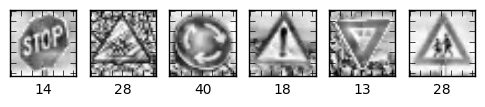

13:Yield  14:Stop  18:General caution  28:Children crossing  40:Roundabout mandatory  

In [29]:
## take a look at new testing images

### create subplot
fig, xaxis = plt.subplots(1,n_new_imgs)
for i in range(n_new_imgs): 
    xaxis[i].imshow(x_new[i],cmap='gray')
    xaxis[i].set_xlabel(new_img_true_label[i])
    plt.setp(xaxis[i].get_xticklabels(), visible=False)
    plt.setp(xaxis[i].get_yticklabels(), visible=False)
plt.show()

chk_duplicate = set()
for c_id in sorted(new_img_true_label):
    if not c_id in chk_duplicate:
        chk_duplicate.add(c_id)
        print("{0}:{1}".format(c_id, sign_name[c_id]), end='  ')

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

>Rather than 5 images, I eventually chose 6 images were collected on the internet and were resized to 50x50 by photo editor.

>I showed the images with the preprocess above, **the first `Children crossing`** is so noisy. I would like to know whether my model can recognize the noisy images well or not.

>However, as the results shown below, all the images were successfully classified by this cnn model except **the first `Children crossing`**.

>The reason that I added the sixth image which is **`Children crossing`** is that this model incorrectly recognize noisy image, **the first `Children crossing`**, with quite high probability when I tried my model at the beginning. Therefore, it is worthy to make sure that this model can not recognize noisy images well or that this model can not recognize **`Children coressing`**. As the results, this model fials to recognize noisy images.

#### Trun 3 dimesional data into 1 dimensional data

In [30]:
## trun 3 dimensional data into 1 dimensional data
x_new = flatten_dataset(x_new)

#### Defining the methods which help to analysis the results

In [31]:
# Get two prediction results, probabilities and corresponding class ID.
def get_pred_res(session, feed_dict):
    pred_prob = session.run(y_pred, feed_dict = feed_dict)
    pred_cls = session.run(y_pred_cls, feed_dict = feed_dict)
    return pred_prob, pred_cls

In [32]:
# plot the probability
def plot_prob(pred_res, n_new_imgs):
    for i in range(n_new_imgs):
        plt.figure(i)
        plt.plot(pred_res[i], color='#428bca')
        plt.ylabel('new_img_{}'.format(i+1))
        if i == 0:
            plt.title('Prediction Probability')
        if i == 5:
            plt.xlabel('Class ID')

#### Begining evalutaion with new test data

In [33]:
## load saved trained model
session = tf.Session()
loader = tf.train.import_meta_graph('cnn_network.meta')
loader.restore(session, tf.train.latest_checkpoint('./'))

In [34]:
## get prediction results, prediction probabilities and corresponding class ID.
pred_prob_res, pred_cls_res = get_pred_res(session, {x: x_new})

In [35]:
## print the prediction results of each new image.
for i in range(n_new_imgs):
    print("Image {} - class {}:\t{}".format(i+1, pred_cls_res[i], sign_name[pred_cls_res[i]]))

Image 1 - class 14:	Stop
Image 2 - class 34:	Turn left ahead
Image 3 - class 40:	Roundabout mandatory
Image 4 - class 18:	General caution
Image 5 - class 13:	Yield
Image 6 - class 28:	Children crossing


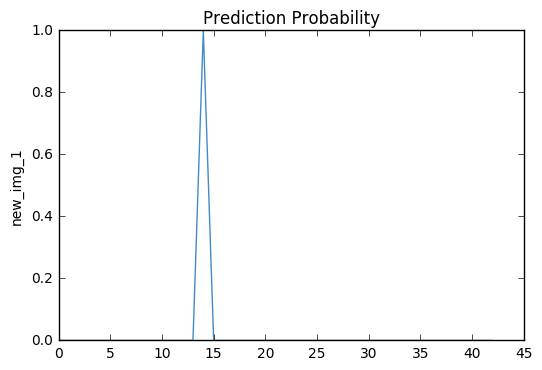

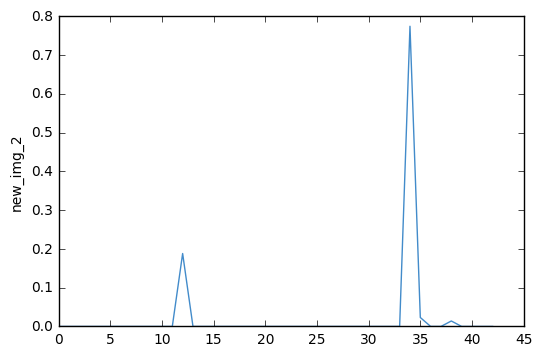

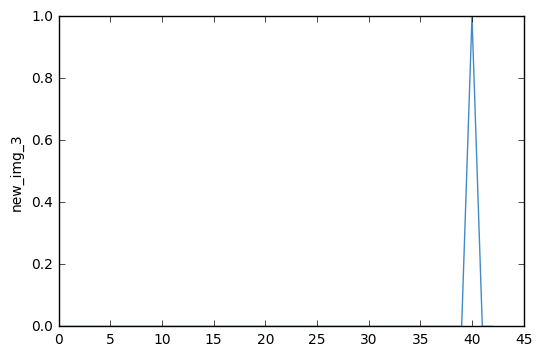

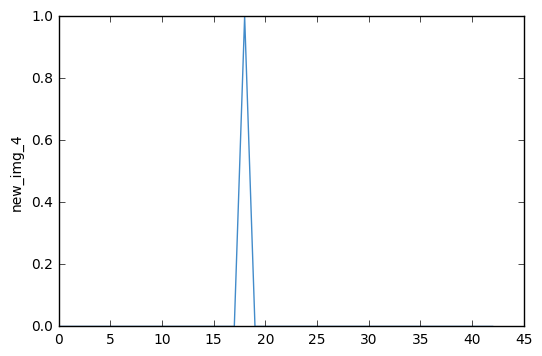

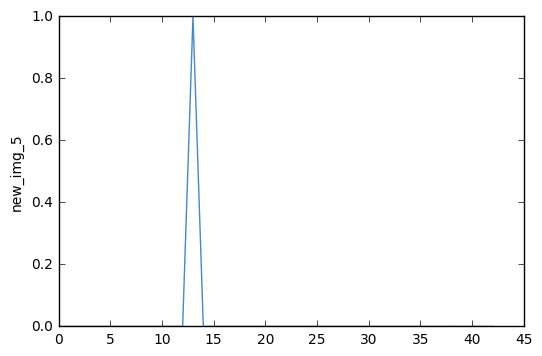

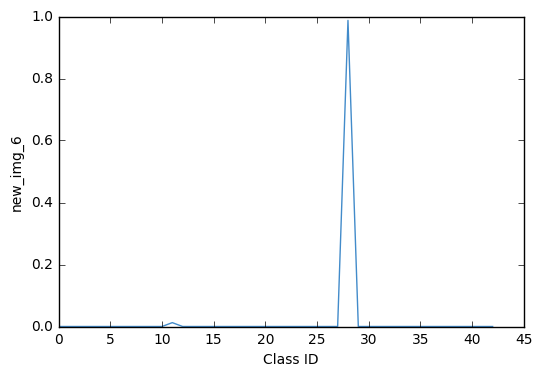

In [36]:
## plot the prediction probability of each new image.
plot_prob(pred_prob_res, n_new_imgs)

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

>As the results shown below, the accruacy of the new test dataset was **83.3%**. Compared it with the original test dataset, **95.4%**, the accuracy of new test dataset is much less than that of original test dataset. However, there are only 6 images in new test dataset, which is quite small. So that the difference could be thought as random errors.

#### Setting true labels and converting ID labels to One-Hot labels

In [37]:
# Calculate accuracy of the new testing image
y_new = new_img_true_label

## convert ID labels to one-hot labels
encoder = LabelBinarizer()
encoder.fit(train_labels)
y_new = encoder.transform(y_new)

#### Calculating accuracy of new test data

In [38]:
## run session to calculate accuracy
accuracy = session.run(accuracy_operation, feed_dict={x: x_new, y: y_new})

## print the accruacy results
print("Accuracy of the new testing image is {0:.1%}".format(accuracy))

Accuracy of the new testing image is 83.3%


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

**Answer:**

>As the results shown below, **`Stop`**, **`General caution`**, **`Yield`** and **the second `Children crossing`** were correctly recognized with almost **100% confidence**. On the other hand, **the first `Children crossing`** was incorrectly recognized with 86.7% as **`Priority road`**.

>One should be noticed is **the first `Children crossing`**, because the probability of **`Children crossing`** is not in top 5 probabilities. In my humble opinion, **the first `Children crossing`** is covered with shadow, which can be thought as a noisy data. And my model fails to recognize noisy data well, which can be shown by the result of **the second `Children crossing`** that is correctly recognized.

#### Defining methods help to analyze top k results

In [39]:
# find the top k result 
def find_top_k(session, feed_dict):
    return session.run(top_k, feed_dict = feed_dict)

In [40]:
# print the results of top_k
def print_top_k(k_top, n_test, k_number):
    probs =k_top[0]
    cls = k_top[1]
    for i in range(n_test):
        print("Image {}:".format(i+1,sign_name[cls[i][0]]))
        for j in range(k_number):
            print("  Top{}:{:>26},   {:>5.1%}".format(j+1, sign_name[cls[i][j]], probs[i][j]))

In [41]:
# plot the top_k
def plot_k_top(k_top, n_test, k_number):
    values = k_top[0]
    index = k_top[1]
    ind = np.arange(k_number)
    width = 0.35
    for i in range(n_test):
        plt.figure(i)
        plt.bar(ind, values[i], width, color='#d9534f')
        plt.xticks(ind + width, tuple(index[i]))
        plt.ylabel('Prediction Probabilities of new_img_{}'.format(i + 1))
        if i == 0:
            plt.title('Top {} Softmax Probabilities for New Image'.format(n_test))
        if i == 4:
            plt.xlabel('Class ID')

#### Getting K top results

In [42]:
## load saved trained model
session = tf.Session()
loader = tf.train.import_meta_graph('cnn_network.meta')
loader.restore(session, tf.train.latest_checkpoint('./'))

In [43]:
# visualize the certainty of its predictions for top 3 probability.
k_number = 5
top_k = tf.nn.top_k(y_pred, k=k_number)

In [44]:
k_top = find_top_k(session, {x: x_new})

In [45]:
print_top_k(k_top, n_new_imgs, k_number)

Image 1:
  Top1:                      Stop,   100.0%
  Top2:                Keep right,    0.0%
  Top3:               No vehicles,    0.0%
  Top4:      Speed limit (80km/h),    0.0%
  Top5:                     Yield,    0.0%
Image 2:
  Top1:             Priority road,   86.7%
  Top2:                Ahead only,   13.3%
  Top3:                Keep right,    0.0%
  Top4:               No vehicles,    0.0%
  Top5:           Turn left ahead,    0.0%
Image 3:
  Top1:      Roundabout mandatory,   100.0%
  Top2:                     Yield,    0.0%
  Top3:      Speed limit (50km/h),    0.0%
  Top4:                Ahead only,    0.0%
  Top5:          Turn right ahead,    0.0%
Image 4:
  Top1:           General caution,   100.0%
  Top2:                 Road work,    0.0%
  Top3:                Keep right,    0.0%
  Top4: Road narrows on the right,    0.0%
  Top5:           Traffic signals,    0.0%
Image 5:
  Top1:                     Yield,   100.0%
  Top2:                Keep right,    0.0%
  Top

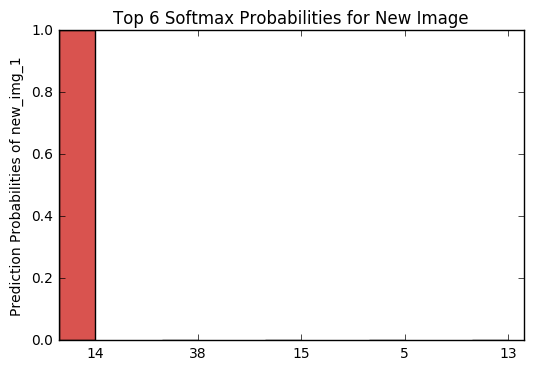

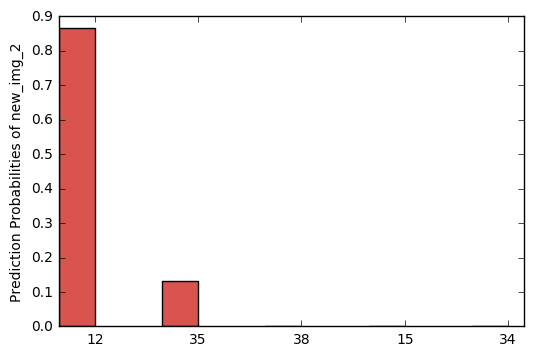

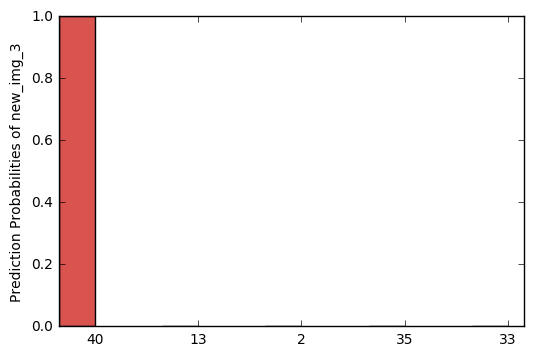

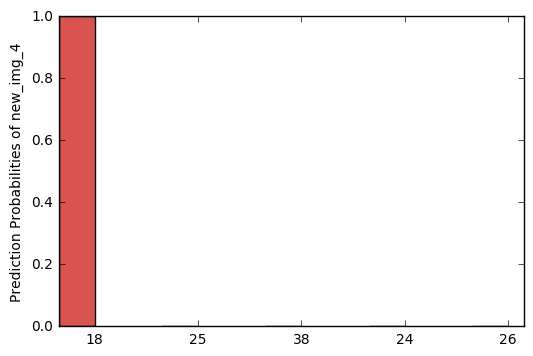

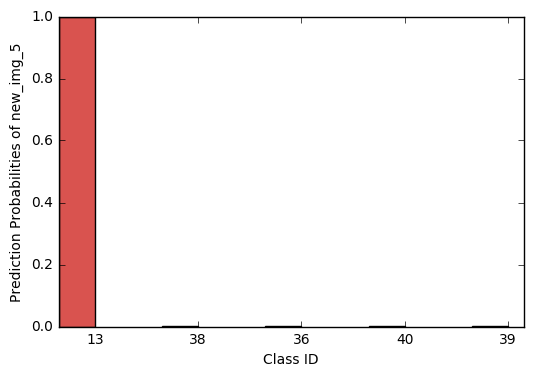

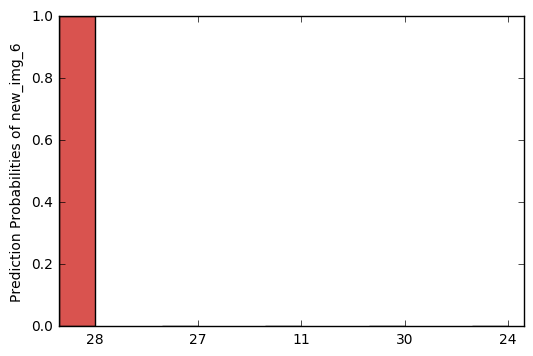

In [46]:
plot_k_top(k_top, n_new_imgs, k_number)

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

## Reference

* Udacity: Traffic Sign Classifier
* [Udacity - CarND-LeNet-Lab](https://github.com/udacity/CarND-LeNet-Lab)
* [Convolutional Neural Networks (LeNet)](http://deeplearning.net/tutorial/lenet.html)
* [Traffic signs classification with Deep Learning. - Mehdi Sqalli](https://hackernoon.com/traffic-signs-classification-with-deep-learning-b0cb03e23efb#.apyle34kf)
* [TensorFlow-Examples - 3_NeuralNetworks](https://github.com/aymericdamien/TensorFlow-Examples/tree/master/examples/3_NeuralNetworks)
* [ Stanford CS class CS231n: Convolutional Neural Networks for Visual Recognition](http://cs231n.github.io/)
* [Deep MNIST for Experts](https://www.tensorflow.org/tutorials/mnist/pros/)